In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager

In [63]:
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

In [64]:
from ipywidgets import interact, widgets
from IPython.display import display

In [65]:
pd.set_option("display.max_columns", 1000)

In [66]:
import os

In [67]:
os.getcwd()

'D:\\Ds\\projects\\final_cwc\\artifacts'

In [68]:
os.chdir("..")

In [69]:
os.chdir(".\\artifacts")

In [70]:
os.getcwd()

'D:\\Ds\\projects\\final_cwc\\artifacts'

In [71]:
matches = pd.read_csv('cwc_2023_matches.csv')
balls = pd.read_csv('cwc_2023_balls.csv')

# Analysis

## Bowling Stats

### most team wickets

In [72]:
balls["wicket_type"].value_counts()

wicket_type
0                    25390
caught                 448
bowled                 141
lbw                     76
run out                 38
caught and bowled       14
stumped                 11
retired hurt             1
Name: count, dtype: int64

In [73]:
most_team_wickets = balls.groupby(["bowling_team"])[[
    "is_wicket"
]].sum().reset_index().sort_values(by="is_wicket", ascending=False)

In [74]:
most_team_wickets

,bowling_team,is_wicket
4,India,100
1,Australia,93
8,South Africa,89
6,New Zealand,73
3,England,69
7,Pakistan,67
5,Netherlands,66
0,Afghanistan,61
9,Sri Lanka,57
2,Bangladesh,53


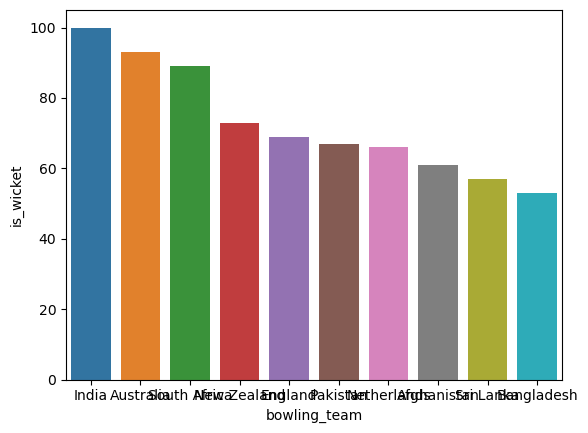

In [75]:
ax = sns.barplot(x=most_team_wickets["bowling_team"],
                 y=most_team_wickets['is_wicket'])

### Best Bowling Figure

In [76]:
balls["is_wicket"] = balls.apply(
    lambda x: 0 if x["wicket_type"] == "retired hurt" else x["is_wicket"],
    axis=1)

In [77]:
without_run_outs = balls[~balls['wicket_type'].isin(['run out'])]
without_byes = without_run_outs[~without_run_outs["extra_type"].
                                isin(["legbyes", "byes"])]

In [78]:
bowling_figure_each_match = without_byes.groupby(["match_id", "bowler"]).agg({
    "total_runs":
    "sum",
    "is_wicket":
    "sum"
}).reset_index()

In [79]:
best_bowling_figure = bowling_figure_each_match.sort_values(
    by=[
        "is_wicket",
        "total_runs",
    ], ascending=[False, True])

In [80]:
best_bowling_figure["figure"] = best_bowling_figure["is_wicket"].astype(
    "str") + "/" + best_bowling_figure["total_runs"].astype("str")

In [81]:
best_bowling_figure

,match_id,bowler,total_runs,is_wicket,figure
544,287,Mohammed Shami,57,7,7/57
391,274,Mohammed Shami,18,5,5/18
440,278,RA Jadeja,33,5,5/33
217,259,Shaheen Shah Afridi,54,5,5/54
248,262,Mohammed Shami,54,5,5/54
...,...,...,...,...,...
273,264,Mustafizur Rahman,76,0,0/76
508,284,Nasum Ahmed,85,0,0/85
319,268,MA Starc,88,0,0/88
428,277,Shaheen Shah Afridi,90,0,0/90


### BEst bowling Average

In [82]:
average_bowling = without_byes.groupby("bowler").agg({
    "total_runs": "sum",
    "is_wicket": "sum"
}).reset_index()

In [83]:
average_bowling["average"] = np.round(
    average_bowling["total_runs"] / average_bowling["is_wicket"], 2)
average_bowling = average_bowling.sort_values(by="average")
average_bowling = average_bowling[average_bowling["average"] != np.inf]
average_bowling

,bowler,total_runs,is_wicket,average
78,RG Sharma,7,1,7.00
62,Mohammed Shami,257,24,10.71
100,V Kohli,15,1,15.00
3,AD Mathews,107,6,17.83
33,JJ Bumrah,373,20,18.65
...,...,...,...,...
45,M Pathirana,185,2,92.50
20,DN Wellalage,196,2,98.00
72,PVD Chameera,196,2,98.00
60,Mohammad Nawaz,223,2,111.50


<Axes: xlabel='bowler', ylabel='average'>

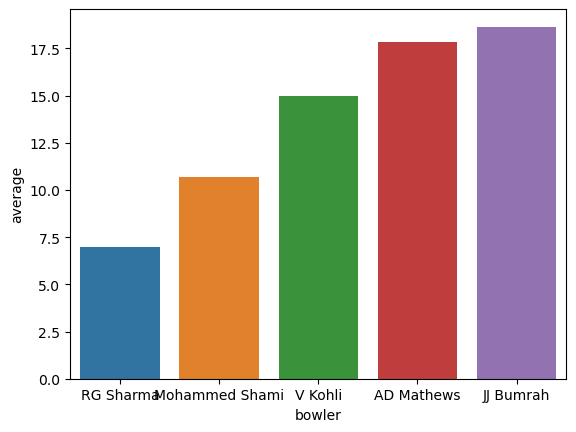

In [84]:
sns.barplot(x=average_bowling["bowler"].head(),
            y=average_bowling["average"].head())

### bowling Strike rate

In [85]:
fair_deliveries = balls[balls['extra_type'].isin(
    ["fair delivery", "byes", "legbyes", "penalty"])]
total_wickets = without_run_outs.groupby(["match_id", "bowler"
                                          ])["is_wicket"].sum().reset_index()
strikerate_inn = fair_deliveries.groupby(["match_id", "bowler"]).agg({
    "balls":
    "count"
}).reset_index()
strikerate_inn = strikerate_inn.merge(total_wickets,
                                      on=["match_id", "bowler"],
                                      how="left")
strikerate_inn["sr"] = strikerate_inn["balls"] / strikerate_inn["is_wicket"]
strikerate_inn = strikerate_inn[(~strikerate_inn['sr'].isin([np.inf])) & (strikerate_inn['is_wicket'] > 1)].sort_values(by='sr').\
sort_values(by =["sr", "is_wicket", "match_id"], ascending = [True, False, True]).head(15)
strikerate_inn

,match_id,bowler,balls,is_wicket,sr
278,265,A Zampa,18,4,4.500000
391,274,Mohammed Shami,30,5,6.000000
234,261,G Coetzee,24,3,8.000000
544,287,Mohammed Shami,59,7,8.428571
2,242,GD Phillips,18,2,9.000000
346,270,Mohammed Shami,42,4,10.500000
440,278,RA Jadeja,54,5,10.800000
333,269,PA van Meekeren,44,4,11.000000
67,247,MJ Santner,60,5,12.000000
217,259,Shaheen Shah Afridi,60,5,12.000000


### strike rate overall

In [86]:
total_wickets1 = without_run_outs.groupby(["bowler"
                                           ])["is_wicket"].sum().reset_index()
fair_deliveries1 = balls[balls['extra_type'].isin(
    ["fair delivery", "byes", "legbyes", "penalty"])]
strikerate_tourney = fair_deliveries1.groupby(["bowler"]).agg({
    "balls": "count"
}).reset_index()
strikerate_tourney = strikerate_tourney.merge(total_wickets1,
                                              on=["bowler"],
                                              how="left")
strikerate_tourney[
    "sr"] = strikerate_tourney["balls"] / strikerate_tourney["is_wicket"]
strikerate_tourney = strikerate_tourney[(~strikerate_tourney['sr'].isin([np.inf]))].sort_values(by='sr').\
sort_values(by =["sr", "is_wicket", ], ascending = [True, False, ]).head(15)
strikerate_tourney

,bowler,balls,is_wicket,sr
78,RG Sharma,5,1,5.000000
62,Mohammed Shami,293,24,12.208333
22,G Coetzee,381,20,19.050000
25,HH Pandya,99,5,19.800000
97,Tanzim Hasan Sakib,60,3,20.000000
79,RJW Topley,166,8,20.750000
100,V Kohli,21,1,21.000000
13,CBRLS Kumara,66,3,22.000000
3,AD Mathews,133,6,22.166667
16,D Madushanka,470,21,22.380952


### Economy Innings

In [92]:
withput_byes = balls[(~balls["extra_type"].isin(["byes", "legbyes"]))]
total_runs_bowlers = withput_byes.groupby(["match_id", "bowler"])["total_runs"].sum().reset_index()
bowl_stats = strikerate_inn.merge(total_runs_bowlers,on=["match_id", "bowler"],)
bowl_stats["economy"] = bowl_stats["total_runs"] / (bowl_stats["balls"] / 6)
economy = bowl_stats[bowl_stats["is_wicket"] > 0]
economy = economy.sort_values(by="economy")
economy

,match_id,bowler,balls,is_wicket,sr,total_runs,economy
0,265,A Zampa,18,4,4.500000,8,2.666667
7,269,PA van Meekeren,44,4,11.000000,23,3.136364
5,270,Mohammed Shami,42,4,10.500000,22,3.142857
1,274,Mohammed Shami,30,5,6.000000,18,3.600000
6,278,RA Jadeja,54,5,10.800000,33,3.666667
14,265,MR Marsh,24,2,12.000000,19,4.750000
9,259,Shaheen Shah Afridi,60,5,12.000000,54,5.400000
10,262,Mohammed Shami,60,5,12.000000,54,5.400000
4,242,GD Phillips,18,2,9.000000,17,5.666667
3,287,Mohammed Shami,59,7,8.428571,57,5.796610


### Economy Tourney

In [45]:
    total_runs_bowlers1 = withput_byes.groupby(
        ["bowler"])["total_runs"].sum().reset_index()
    bowl_stats1 = strikerate_tourney.merge(
        total_runs_bowlers1,
        on=["bowler"],
    )
    bowl_stats1["economy"] = bowl_stats1["total_runs"] / (bowl_stats1["balls"] / 6)
    economy1 = bowl_stats1[bowl_stats1["is_wicket"] > 0]
    economy1.sort_values(by="economy").head(15)

,bowler,balls,is_wicket,sr,total_runs,economy
73,R Ashwin,60,1,60.000000,34,3.400000
33,JJ Bumrah,551,20,27.550000,373,4.061706
59,Mohammad Nabi,369,8,46.125000,254,4.130081
36,KA Maharaj,534,15,35.600000,370,4.157303
76,RA Jadeja,561,16,35.062500,398,4.256684
100,V Kohli,21,1,21.000000,15,4.285714
38,Kuldeep Yadav,571,15,38.066667,424,4.455342
81,Rashid Khan,519,11,47.181818,388,4.485549
4,AK Markram,111,1,111.000000,85,4.594595
69,Noor Ahmad,228,5,45.600000,182,4.789474


### most maiden

In [46]:
conceded_runs = balls[(balls["extra_type"] != "legbyes")
                      & (balls["extra_type"] != "byes") &
                      (balls["extra_type"] != "penalty")]

In [47]:
runs = conceded_runs.groupby(["match_id", "over_num",
                              "bowler"])["total_runs"].sum().reset_index()

In [48]:
runs[runs["total_runs"] == 0].groupby(
    ["bowler"])["total_runs"].count().sort_values(ascending=False)

bowler
JR Hazlewood           9
JJ Bumrah              9
K Rabada               8
A Dutt                 6
Mohammed Siraj         6
L Ngidi                6
DJ Willey              6
TA Boult               6
MJ Henry               5
RA Jadeja              4
D Madushanka           4
Mohammed Shami         4
Mohammad Nabi          4
MJ Santner             4
Shoriful Islam         4
PVD Chameera           3
Mustafizur Rahman      3
SM Curran              3
Mohammad Wasim         3
Mehedi Hasan Miraz     3
Shaheen Shah Afridi    3
M Jansen               3
LH Ferguson            3
Taskin Ahmed           3
Kuldeep Yadav          3
M Theekshana           2
Rashid Khan            2
PA van Meekeren        2
CN Ackermann           2
Mujeeb Ur Rahman       2
CR Woakes              2
Fazalhaq Farooqi       2
RJW Topley             2
Hasan Ali              2
MA Starc               2
AK Markram             2
AD Mathews             2
CAK Rajitha            1
C Karunaratne          1
R Ravindra        

## OVERALL STATS

In [22]:
overall_stats = balls.groupby(["match_id", "batting_team",
                               "batsmen"])["batsmen_runs"].sum().reset_index()
overall_stats

,match_id,batting_team,batsmen,batsmen_runs
0,242,England,AU Rashid,15
1,242,England,CR Woakes,11
2,242,England,DJ Malan,14
3,242,England,HC Brook,25
4,242,England,JC Buttler,43
...,...,...,...,...
866,289,India,RG Sharma,47
867,289,India,SA Yadav,18
868,289,India,SS Iyer,4
869,289,India,Shubman Gill,4


### 100 by each team

In [23]:
@interact
def most_100s(team=matches["team_1"].unique().tolist()):
    m = overall_stats[overall_stats["batsmen_runs"] > 99].groupby(
        'batting_team')["batsmen_runs"].count().reset_index()

    m.loc[len(m)] = {"batting_team": "Netherlands", "batsmen_runs": 0}
    # Sorting the DataFrame by "batting_team"
    return m[m["batting_team"] == team]

interactive(children=(Dropdown(description='team', options=('England', 'Pakistan', 'Afghanistan', 'South Afric…

In [ ]:
most_100s

### 50 by each team

In [ ]:
most_50s = overall_stats[(overall_stats["batsmen_runs"] > 49) & (overall_stats["batsmen_runs"] <= 99) ].groupby('batting_team')["batsmen_runs"].count().reset_index().\
sort_values(by="batting_team")

In [ ]:
most_50s

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have most_50s and most_100s DataFrames
# ...

fig, ax = plt.subplots(figsize=(16, 12))

bar_positions_venue = np.arange(len(most_50s))

ax.barh(bar_positions_venue, most_50s['batsmen_runs'], label='50')
ax.barh(bar_positions_venue, (most_100s['batsmen_runs'] * -1), label='100s')

ax.set_yticks(bar_positions_venue)
ax.set_yticklabels(most_50s.batting_team)
ax.set_xticklabels(ax.get_xticks(), color="w")
plt.legend()

for i, value in enumerate(most_50s['batsmen_runs']):
    ax.text(value + 0.1, i, str(value), va='center', fontsize=10)

for i, value in enumerate(most_100s['batsmen_runs']):
    ax.text(-value - 0.1, i, str(value), va='center', ha='right', fontsize=10)
plt.show()

### 4s by each team

In [ ]:
fours_balls = balls[balls["batsmen_runs"] == 4]
totl_fours_team = fours_balls.groupby(
    "batting_team")["batsmen_runs"].count().reset_index()

In [ ]:
totl_fours_team

### 6 by each team

In [ ]:
sixes_balls = balls[balls["batsmen_runs"] == 6]
totl_sixes_team = sixes_balls.groupby(
    "batting_team")["batsmen_runs"].count().reset_index()

In [ ]:
totl_sixes_team

In [ ]:
total_boundaries = totl_sixes_team.merge(totl_fours_team, on="batting_team")

In [ ]:
fig, ax = plt.subplots(figsize=(16, 12))

bar_positions_venue = np.arange(len(total_boundaries))

ax.barh(bar_positions_venue, total_boundaries['batsmen_runs_x'], label='6s')
ax.barh(bar_positions_venue, (total_boundaries['batsmen_runs_y'] * -1),
        label='4s')

ax.set_yticks(bar_positions_venue)
ax.set_yticklabels(total_boundaries.batting_team)
ax.set_xticklabels(ax.get_xticks(), color="w")
legend = plt.legend()
# legend.

for i, value in enumerate(total_boundaries['batsmen_runs_x']):
    ax.text(value + 0.1, i, str(value), va='center', fontsize=10)

for i, value in enumerate(total_boundaries['batsmen_runs_y']):
    ax.text(-value - 0.1, i, str(value), va='center', ha='right', fontsize=10)
plt.show()

### each team wins

In [ ]:
def most_wins(matches_df):

    return matches_df["match_winner"].value_counts().reset_index().rename(
        columns={
            "match_winner": "Team",
            "count": "No of Wins"
        })


wins_count = most_wins(matches)

print(type(wins_count))
print(wins_count['Team'].unique())
print(wins_count['Team'].dtype)
print(wins_count["No of Wins"].dtype)
print(type(matches))
wins_count

### toss winner

In [ ]:
toss_winner = matches["toss_winner"].value_counts()
toss_winner

### venues

In [ ]:
venues = matches["venue"].value_counts()
venues

### most runs in 1st 10 overs

In [ ]:
(balls[balls["over_num"]< 10].groupby(["batting_team"])["total_runs"].sum()  /
 balls[(balls["extra_type"] != "noballs") & (balls["extra_type"] != "wides") & (balls["over_num"] < 10)  ].\
 groupby(["batting_team"])["over_num"].count() )*10

### most runs in last 10 overs

In [ ]:
(balls[balls["over_num"]> 40].groupby(["batting_team"])["total_runs"].sum() /
 balls[(balls["extra_type"] != "noballs") & (balls["extra_type"] != "wides") & (balls["over_num"] > 40)  ].\
 groupby(["batting_team"])["over_num"].count() )*10

### run rate in middle overs

In [ ]:
(balls[balls["over_num"]> 40].groupby(["batting_team"])["total_runs"].sum() /
 balls[(balls["extra_type"] != "noballs") & (balls["extra_type"] != "wides") & (balls["over_num"] < 40)
    & (balls["over_num"] > 10) ].\
 groupby(["batting_team"])["over_num"].count() )*10

### 1st innings average score at different venue

In [ ]:
balls = balls.merge(matches[["match_id", "city"]], on="match_id")

In [ ]:
first_inn = balls[balls["inning_no"] == 1]
np.round(
    first_inn.groupby(["city"])["total_runs"].sum() /
    matches["city"].value_counts().sort_index()).reset_index()

### toss win match win %

In [ ]:
np.round(matches[matches["toss_winner"] == matches["match_winner"]].shape[0] /
         matches.shape[0] * 100)

### toss decision %

In [ ]:
matches["toss_decision"].value_counts().plot(kind="pie", autopct="%.2f%%")
plt.pie(radius=0.8, colors="w", x=[360])
matches["toss_decision"].value_counts().reset_index()

### batting 1st won or bowling 1st

In [ ]:
bat1 = matches[matches["toss_decision"] == "bat"]

In [ ]:
bat_1_wom = matches[(matches["toss_decision"] == "bat") & (
    matches["toss_winner"] == matches["match_winner"])].shape[0] + matches[
        (matches["toss_decision"] == "field")
        & (matches["toss_winner"] != matches["match_winner"])].shape[0]

In [ ]:
bat_2_wom = matches[(matches["toss_decision"] == "bat") & (
    matches["toss_winner"] != matches["match_winner"])].shape[0] + matches[
        (matches["toss_decision"] == "field")
        & (matches["toss_winner"] == matches["match_winner"])].shape[0]

In [ ]:
plt.pie([bat_1_wom, bat_2_wom],
        autopct="%.2f%%",
        labels=['bat_1_wom', 'bat_2_wom'])

### eachh teams average score in 1st inning

In [ ]:
balls[balls['inning_no'] == 1].groupby(
    ["batting_team"])["total_runs"].sum() / matches["team_1"].value_counts()

### toss decision by venue

In [ ]:
grouped = matches.groupby(["venue",
                           "toss_decision"]).size().unstack().reset_index()
fig, ax = plt.subplots()
bar_width = 0.35
bar_positions_bat = np.arange(len(grouped))
ax.barh(
    bar_positions_bat - bar_width / 2,
    grouped['bat'],
    bar_width,
)
ax.barh(
    bar_positions_bat + bar_width / 2,
    grouped['field'],
    bar_width,
)
ax.set_yticks(bar_positions_bat)
ax.set_yticklabels(grouped.index)
grouped

### bat 1st win or lose by venue

In [ ]:
venue_111 = matches[(matches["toss_decision"] == "bat")
                    & (matches["toss_winner"] == matches["match_winner"]
                       )]["venue"].value_counts().reset_index()
venue__112 = matches[(matches["toss_decision"] == "field")
                     & (matches["toss_winner"] != matches["match_winner"]
                        )]["venue"].value_counts().reset_index()
venue_bat_won = venue_111.merge(venue__112, on="venue", how="outer").fillna(0)
venue_222 = matches[(matches["toss_decision"] == "bat")
                    & (matches["toss_winner"] != matches["match_winner"]
                       )]["venue"].value_counts().reset_index()
venue__212 = matches[(matches["toss_decision"] == "field")
                     & (matches["toss_winner"] == matches["match_winner"]
                        )]["venue"].value_counts().reset_index()
venue_field_won = venue_222.merge(venue__212, on="venue",
                                  how="outer").fillna(0)
venue_field_won[
    "won"] = venue_field_won["count_x"] + venue_field_won["count_y"]
venue_bat_won["won"] = venue_bat_won["count_x"] + venue_bat_won["count_y"]
venue_bat_won["won"] = (venue_bat_won["won"])
venue = venue_bat_won[["venue", "won"]].merge(venue_field_won[["venue",
                                                               "won"]],
                                              on='venue')
venue

In [ ]:
venue = venue.sort_values(by='venue')

fig, ax = plt.subplots()
# bar_width = 0.35
bar_positions_venue = np.arange(len(venue))

ax.barh(bar_positions_venue, venue['won_y'], label='bat 2')

ax.barh(bar_positions_venue, (venue['won_x'] * -1), label='bat 1')

ax.set_yticks(bar_positions_venue)
ax.set_yticklabels(venue['venue'])
plt.legend()
ax.set_xlim(-5, 5)
ax.set_xticklabels([5, 4, 3, 2, 1, 0, 1, 2, 3, 4, 5])
ax.set_yticks(bar_positions_venue)
ax.set_yticklabels(venue['venue'])
plt.legend()

ax.set_xticks([-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5])
ax.set_xticklabels([5, 4, 3, 2, 1, 0, 1, 2, 3, 4, 5])

plt.show()
plt.show()

In [ ]:
match_agg = balls.groupby(["match_id"]).agg({
    'total_runs': 'sum'
}).reset_index().sort_values(by="total_runs", ascending=False)
match_agg[["team_1", "team_2"]] = matches[matches["match_id"].isin(
    match_agg["match_id"].tolist())][["team_1", "team_2"]]
match_agg["vs"] = match_agg["team_1"] + str(" vs ") + match_agg["team_2"]

In [ ]:
match_agg